In [1]:
conda install libpython m2w64-toolchain -c msys2

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
!pip install pystan

In [3]:
!pip install fbprophet

In [4]:

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

data.shape

(144, 1)

In [6]:
# head of the data
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


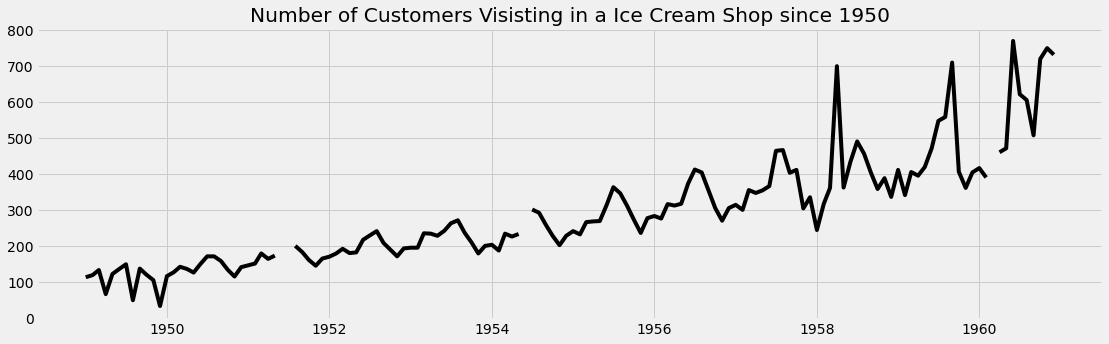

In [7]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

In [8]:
# splitting the training and testing data
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [9]:
# checking the shape of the training data
train.shape

(115, 1)

In [10]:
from fbprophet import Prophet
# initialisaing prophet model
model = Prophet()

In [11]:
# fitting the model with the training set
model.fit(train.reset_index().rename(columns = {'Date':'ds','Customers':'y'}))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# making predictions on testing data
prediction = model.predict(test.reset_index().rename(columns = {'Date':'ds'}))

In [13]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1958-08-01,412.330418,404.671595,497.551904,412.329327,412.333145,37.421732,37.421732,37.421732,37.421732,37.421732,37.421732,0.0,0.0,0.0,449.752151
1,1958-09-01,415.690208,383.029550,475.538590,415.665317,415.713640,13.613806,13.613806,13.613806,13.613806,13.613806,13.613806,0.0,0.0,0.0,429.304014
2,1958-10-01,418.941617,354.403750,449.290958,418.881316,418.997594,-13.435157,-13.435157,-13.435157,-13.435157,-13.435157,-13.435157,0.0,0.0,0.0,405.506460
3,1958-11-01,422.301407,325.034797,419.331834,422.190714,422.399109,-49.624634,-49.624634,-49.624634,-49.624634,-49.624634,-49.624634,0.0,0.0,0.0,372.676773
4,1958-12-01,425.552816,341.548290,435.583734,425.382654,425.712454,-34.930820,-34.930820,-34.930820,-34.930820,-34.930820,-34.930820,0.0,0.0,0.0,390.621997


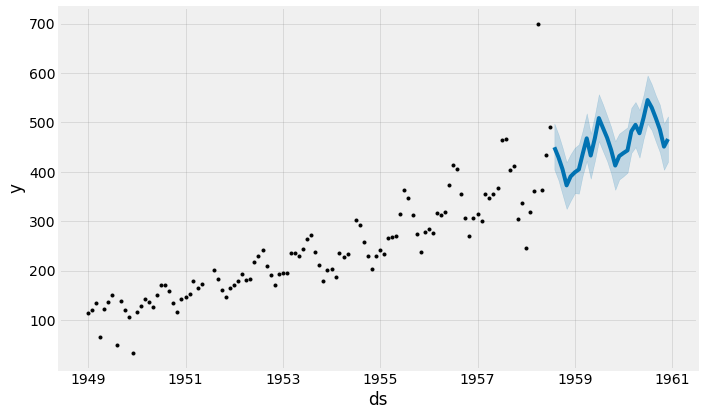

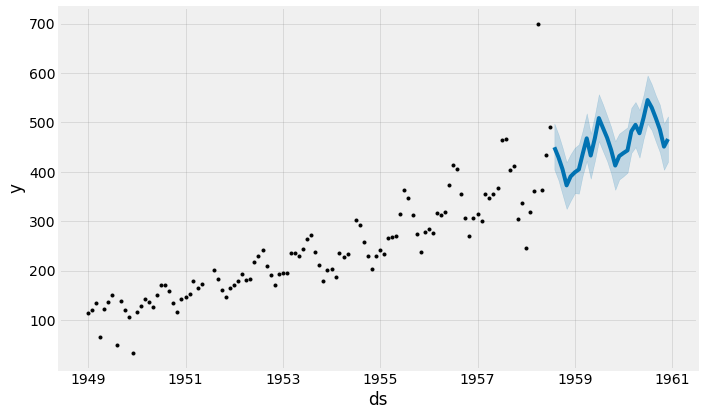

In [14]:
# prediction plot
model.plot(prediction)

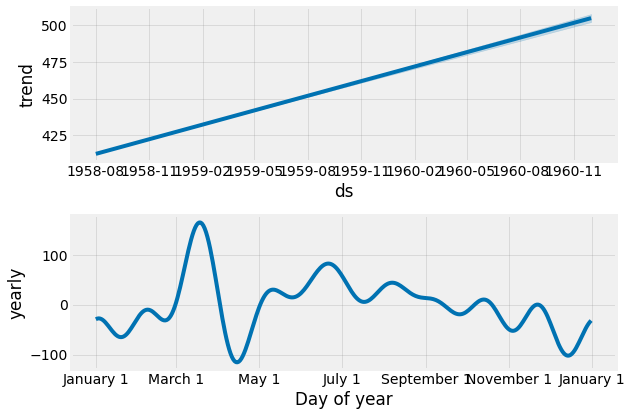

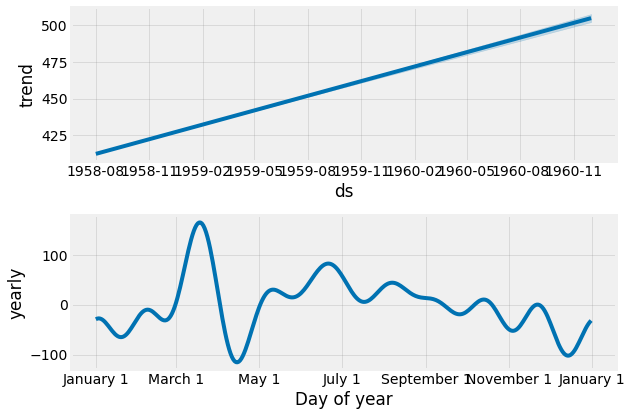

In [15]:
# plotting the components of the model
model.plot_components(prediction)

In [16]:
# cross validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 12 forecasts with cutoffs between 1952-01-01 12:00:00 and 1957-07-01 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1952-02-01,171.877244,158.619853,184.826726,180.0,1952-01-01 12:00:00
1,1952-03-01,221.270782,208.357036,235.112303,193.0,1952-01-01 12:00:00
2,1952-04-01,140.904896,128.049114,155.093144,181.0,1952-01-01 12:00:00
3,1952-05-01,208.050262,194.654503,221.523687,183.0,1952-01-01 12:00:00
4,1952-06-01,243.505489,229.713967,257.191894,218.0,1952-01-01 12:00:00


In [17]:
# performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days 12:00:00,2551.790714,50.515252,39.832900,0.148398,0.147271,0.357143
1,32 days 12:00:00,2585.769111,50.850458,40.734790,0.149262,0.133197,0.321429
2,59 days 12:00:00,1984.450231,44.547169,35.088636,0.131648,0.128015,0.357143
3,60 days 12:00:00,1317.034401,36.290969,27.470776,0.102964,0.096108,0.500000
4,61 days 00:00:00,633.889573,25.177164,20.032192,0.087943,0.084006,0.535714
